In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
train_data = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test')

print("Training texts:", len(train_data.data))
print("Test texts:", len(test_data.data))

Training texts: 11314
Test texts: 7532


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])
  
print("Preprocessing training data...")
train_preprocessed = preprocessing.fit_transform(train_data.data)

print("Preprocessing test data...")
test_preprocessed = preprocessing.transform(test_data.data)

Preprocessing training data...
Preprocessing test data...


In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

nb_classifier = MultinomialNB()
svm_classifier = LinearSVC()
lr_classifier = LogisticRegression(multi_class="ovr")

print("Training Naive Bayes classifier...")
nb_classifier.fit(train_preprocessed, train_data.target)

print("Training SVM classifier...")
svm_classifier.fit(train_preprocessed, train_data.target)

print("Training Logistic Regression classifier...")
lr_classifier.fit(train_preprocessed, train_data.target)

Training Naive Bayes classifier...
Training SVM classifier...
Training Logistic Regression classifier...


C:\Users\AKYEA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
nb_predictions = nb_classifier.predict(test_preprocessed)
svm_predictions = svm_classifier.predict(test_preprocessed)
lr_predictions = lr_classifier.predict(test_preprocessed)

In [6]:
import numpy as np

print("NB Accuracy:", np.mean(nb_predictions == test_data.target))
print("SVM Accuracy:", np.mean(svm_predictions == test_data.target))
print("LR Accuracy:", np.mean(lr_predictions == test_data.target))

NB Accuracy: 0.7738980350504514
SVM Accuracy: 0.8531598513011153
LR Accuracy: 0.8279341476367499


In [7]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(0, 3, 10)}
parameters = {'C': [0.1, 1, 10, 100, 1000]}

print("Grid search for SVM")
svm_best = GridSearchCV(svm_classifier, parameters, cv=3, verbose=1)
svm_best.fit(train_preprocessed, train_data.target)

print("Grid search for logistic regression")
lr_best = GridSearchCV(lr_classifier, parameters, cv=3, verbose=1)
lr_best.fit(train_preprocessed, train_data.target)

Grid search for SVM
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\AKYEA\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 16.4min finished


Grid search for logistic regression
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\AKYEA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 13.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=1)

In [8]:
print("Best SVM Parameters")
print(svm_best.best_params_)

print("Best LR parameters:")
print(lr_best.best_params_)

Best SVM Parameters
{'C': 1}
Best LR parameters:
{'C': 1000}


In [9]:
best_svm_predictions = svm_best.predict(test_preprocessed)
best_lr_predictions = lr_best.predict(test_preprocessed)

print("Best SVM Accuracy:", np.mean(best_svm_predictions == test_data.target))
print("Best LR Accuracy:", np.mean(best_lr_predictions == test_data.target))

Best SVM Accuracy: 0.8531598513011153
Best LR Accuracy: 0.8513011152416357


In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_data.target, best_svm_predictions, target_names=test_data.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.80      0.81       319
           comp.graphics       0.76      0.80      0.78       389
 comp.os.ms-windows.misc       0.77      0.73      0.75       394
comp.sys.ibm.pc.hardware       0.71      0.76      0.74       392
   comp.sys.mac.hardware       0.84      0.86      0.85       385
          comp.windows.x       0.87      0.76      0.81       395
            misc.forsale       0.83      0.91      0.87       390
               rec.autos       0.92      0.91      0.91       396
         rec.motorcycles       0.95      0.95      0.95       398
      rec.sport.baseball       0.92      0.95      0.93       397
        rec.sport.hockey       0.96      0.98      0.97       399
               sci.crypt       0.93      0.94      0.93       396
         sci.electronics       0.81      0.79      0.80       393
                 sci.med       0.90      0.87      0.88       396
         

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text xticklabel objects>)

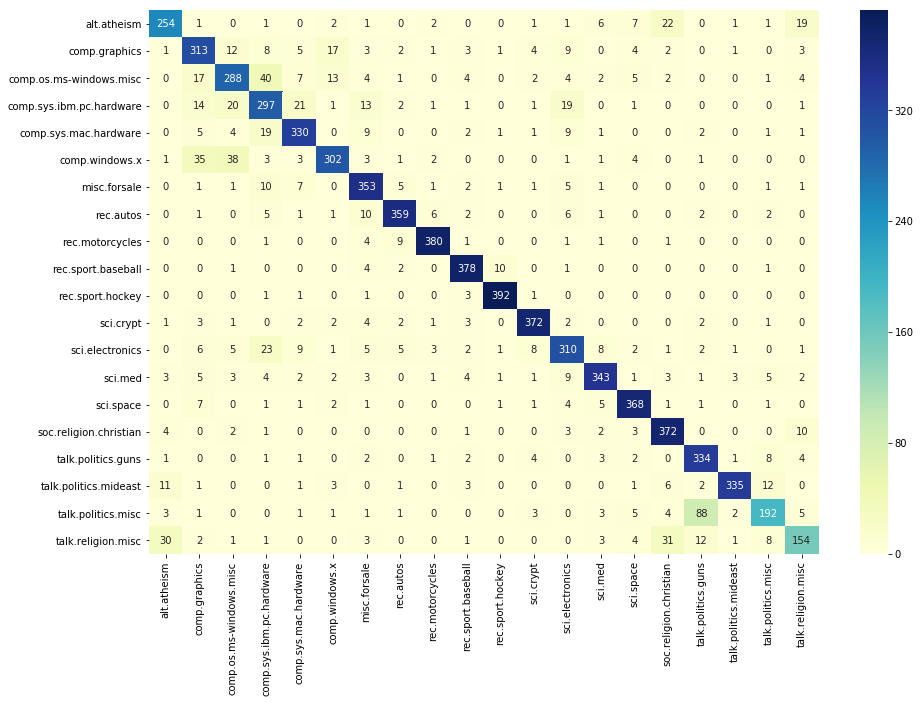

In [12]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(test_data.target, best_svm_predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=test_data.target_names, columns=test_data.target_names)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [14]:
import eli5

eli5.explain_weights(svm_best.best_estimator_, 
                     feature_names = preprocessing.named_steps["vect"].get_feature_names(),
                     target_names = train_data.target_names
                    )

Using TensorFlow backend.


Explanation(estimator="LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,\n     intercept_scaling=1, loss='squared_hinge', max_iter=1000,\n     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,\n     verbose=0)", description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='alt.atheism', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='atheism', weight=2.4444145329053515, std=None, value=None), FeatureWeight(feature='keith', weight=1.990740928287796, std=None, value=None), FeatureWeight(feature='atheists', weight=1.806433046263282, std=None, value=None), FeatureWeight(feature='islamic', weight=1.4966352782234709, std=None, value=None), FeatureWeight(feature='cobb', weight=1.473798695033497, std=None, value=None), FeatureWeight(feature='rushdie', weight=1.4602516539092507, std=None, value=None), FeatureWeight(feature='wingate', weight=1.3886270748537988, std=None, value=None), FeatureWeight(feature='okcforum', weight=1.317208671925448, std=None, value=None), FeatureWeight(feature='jaeger', weight=1.2835443533604083, std=None, value=None), FeatureWeight(feature='mangoe', weight=1.269054758193497, std=None, value=None), FeatureWeight(feature='mathew', weight=1.216431650829177, std=None, value=None), FeatureWeight(feature='enviroleague', weight=1.18769861827567, std=None, value=None), FeatureWeight(feature='charley', weight=1.1697281629104708, std=None, value=None), FeatureWeight(feature='motto', weight=1.107486066408791, std=None, value=None), FeatureWeight(feature='livesey', weight=1.1070140061675404, std=None, value=None), FeatureWeight(feature='benedikt', weight=1.1025403672286367, std=None, value=None), FeatureWeight(feature='osrhe', weight=1.1024310907826542, std=None, value=None), FeatureWeight(feature='tammy', weight=1.0991796473327053, std=None, value=None), FeatureWeight(feature='bsa', weight=1.097073484323427, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-1.0850546738023679, std=None, value=None)], pos_remaining=10922, neg_remaining=34850), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='comp.graphics', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='graphics', weight=3.891138619603272, std=None, value=None), FeatureWeight(feature='3d', weight=2.3465638461943974, std=None, value=None), FeatureWeight(feature='image', weight=2.2826407997348763, std=None, value=None), FeatureWeight(feature='3do', weight=2.125600211857882, std=None, value=None), FeatureWeight(feature='pov', weight=2.083339879505178, std=None, value=None), FeatureWeight(feature='images', weight=2.0091470643076206, std=None, value=None), FeatureWeight(feature='tiff', weight=1.9832259686020368, std=None, value=None), FeatureWeight(feature='cview', weight=1.9681191593957763, std=None, value=None), FeatureWeight(feature='polygon', weight=1.8168382302694053, std=None, value=None), FeatureWeight(feature='animation', weight=1.777210135044299, std=None, value=None), FeatureWeight(feature='format', weight=1.5560892845766556, std=None, value=None), FeatureWeight(feature='mpeg', weight=1.5422346330678653, std=None, value=None), FeatureWeight(feature='surface', weight=1.4634537611281715, std=None, value=None), FeatureWeight(feature='sphere', weight=1.4588710926770012, std=None, value=None), FeatureWeight(feature='points', weight=1.3844929271153088, std=None, value=None), FeatureWeight(feature='42', weight=1.2520563284901578,